# SYMBOLIC STUDY
## **DOUBLE WISHBONE ASSEMBLY**
-----------------

### STUDY DISCRIPTION
---------------------

_Double click to write a discription here ..._

-----------------------------------------------

### **NOTE**
#### **Adding package path to system path and creating needed directories.**
The current ```pkg_path``` variable is where I have the repository on my machine. You should change it to where you cloned the repository on your machine.

-----------------------------------------------

In [1]:
pkg_path = '/home/khaledghobashy/Documents/smbd'

In [2]:
import sys
sys.path.append(pkg_path)

## IMPORTING TOPLOGIES
----------------------

In [2]:
import smbd.interfaces.scripting as sui

In [3]:
suspension = sui.load_pickled_data('double_wishbone_direct_acting.stpl')
testrig = sui.load_pickled_data('suspension_actuation_testrig.stpl')

## CREATING ASSEMBLY
--------------------

In [4]:
model = sui.assembly('double_wishbone_assembly')

### CREATING SUBSYSTEMS

In [5]:
model.add_subsystem('SU', suspension)
model.add_subsystem('TR', testrig)

### ASSIGNING VIRTUAL BODIES

In [6]:
model.assign_virtual_body('TR.vbr_hub', 'SU.rbr_hub')
model.assign_virtual_body('TR.vbr_upright', 'SU.rbr_upright')

### ASSEMBLING AND SAVING STSYEM

In [7]:
model.assemble_model()

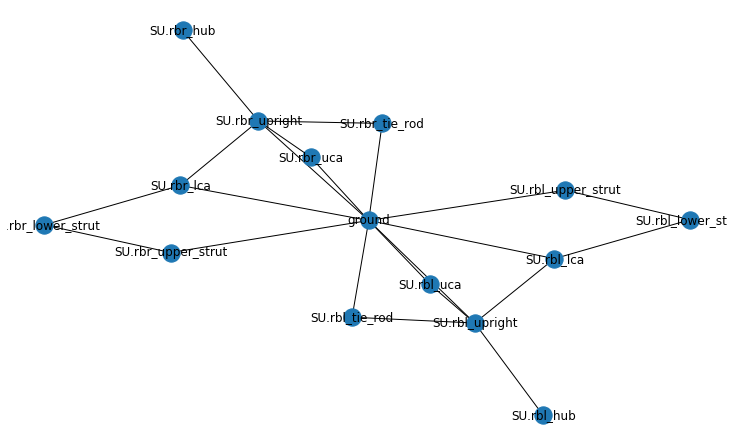

In [8]:
model.draw_constraints_topology()

## CODE GENERATION

### CREATING TOPOLOGY & CONFIGURATION NUMERICAL CODE FILES

In [10]:
from smbd.numenv.python.codegen import generators

In [11]:
model_code = generators.assembly_codegen(model._mbs)
model_code.write_code_file('numenv/assemblies')

File full path : numenv/assemblies/double_wishbone_assembly.py
